In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.model_selection import train_test_split
from keras import layers
from keras import models
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

In [0]:
# prepare data

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ANN/data3.csv') 
train, val = train_test_split(data, train_size=0.8)

# get maximum length
max_l = 0
for i in range(len(data)):
  l = len(literal_eval(data['keypoints'][i]))
  if l > max_l:
    max_l = l

X = np.zeros((len(data), max_l, 75))
y = np.zeros(len(data))
for j in range(len(data)):
  l_keypoints = literal_eval(data['keypoints'][j])
  X[j, 0:len(l_keypoints)] = np.array(l_keypoints)
  y[j] = 1 if data['label'][j] == 'pick' else 0

X_train = np.zeros((len(train), max_l, 75))
y_train = np.zeros(len(train))
q = 0
for j in train.index:
  l_keypoints = literal_eval(train['keypoints'][j])
  X_train[q, 0:len(l_keypoints)] = np.array(l_keypoints)
  y_train[q] = 1 if train['label'][j] == 'pick' else 0
  q += 1

X_val = np.zeros((len(val), max_l, 75))
y_val = np.zeros(len(val))
q = 0
for j in val.index:
  l_keypoints = literal_eval(val['keypoints'][j])
  X_val[q, 0:len(l_keypoints)] = np.array(l_keypoints)
  y_val[q] = 1 if val['label'][j] == 'pick' else 0
  q += 1

print("X_train: %s    y_train: %s \nX_val: %s    y_val: %s " %(X_train.shape, y_train.shape, X_val.shape, y_val.shape))


X_train: (56, 81, 75)    y_train: (56,) 
X_val: (14, 81, 75)    y_val: (14,) 


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                35840     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 37,953
Trainable params: 37,953
Non-trainable params: 0
_________________________________________________________________


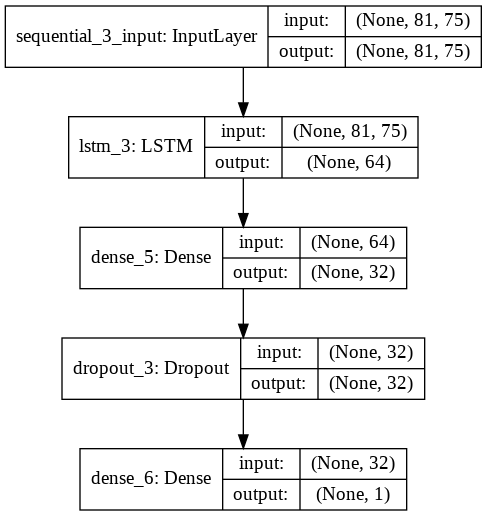

In [0]:
# build NN

model = models.Sequential()
model.add(layers.LSTM(64))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')

model.build(input_shape = (None, 81, 75)) 
model.summary()

plot_model(model, to_file='/content/drive/My Drive/Colab Notebooks/ANN/model1_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# train NN

history = model.fit(X_train, y_train, epochs=50, batch_size=128,
                    shuffle=True, validation_data=(X_val, y_val))

Train on 56 samples, validate on 14 samples
Epoch 1/50
56/56 [==============================] - 1s 19ms/step - loss: 0.2518 - val_loss: 0.2380
Epoch 2/50
56/56 [==============================] - 0s 3ms/step - loss: 0.2489 - val_loss: 0.2390
Epoch 3/50
56/56 [==============================] - 0s 3ms/step - loss: 0.2465 - val_loss: 0.2377
Epoch 4/50
56/56 [==============================] - 0s 3ms/step - loss: 0.2417 - val_loss: 0.2338
Epoch 5/50
56/56 [==============================] - 0s 3ms/step - loss: 0.2395 - val_loss: 0.2287
Epoch 6/50
56/56 [==============================] - 0s 3ms/step - loss: 0.2390 - val_loss: 0.2265
Epoch 7/50
56/56 [==============================] - 0s 3ms/step - loss: 0.2359 - val_loss: 0.2242
Epoch 8/50
56/56 [==============================] - 0s 3ms/step - loss: 0.2342 - val_loss: 0.2220
Epoch 9/50
56/56 [==============================] - 0s 3ms/step - loss: 0.2287 - val_loss: 0.2205
Epoch 10/50
56/56 [==============================] - 0s 3ms/step - loss: 

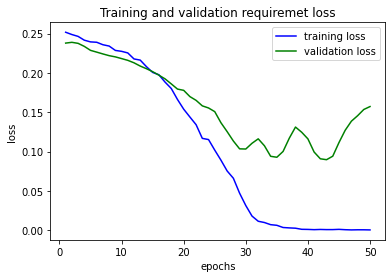

In [0]:
# Show loss

epochs = range(1,51)
plt.plot(epochs, history.history['loss'], 'b', label = 'training loss')
plt.plot(epochs, history.history['val_loss'], 'g', label = 'validation loss')
plt.title('Training and validation requiremet loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


In [0]:
# train again with all data and 20 epoch

history = model.fit(X, y, epochs=20, batch_size=128)

model.save('/content/drive/My Drive/Colab Notebooks/ANN/model1.h5')

Epoch 1/20
70/70 [==============================] - 0s 2ms/step - loss: 0.0462
Epoch 2/20
70/70 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 3/20
70/70 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 4/20
70/70 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 5/20
70/70 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 6/20
70/70 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 7/20
70/70 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 8/20
70/70 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 9/20
70/70 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 10/20
70/70 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 11/20
70/70 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 12/20
70/70 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 13/20
70/70 [==============================